In [2]:
from generators import GEN
from planners import PLAN, OPENAI_KEY, SYS_PROMPT, EXAMPLES
from editors import EDIT
from diffusers.utils import make_image_grid

In [3]:
MODEL = 'sd1.5' #options : ['sd1.5', 'sd2.1', 'sdxl', 'sd3.5 large', 'pixart', 'pg2.5', 'deepfloyd']
PROMPT = "a black dog on a brown couch with white wall"
genny = GEN(MODEL)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/home/scai/phd/aiz228170/.conda/envs/pixedit/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information

  0%|          | 0/50 [00:00<?, ?it/s]

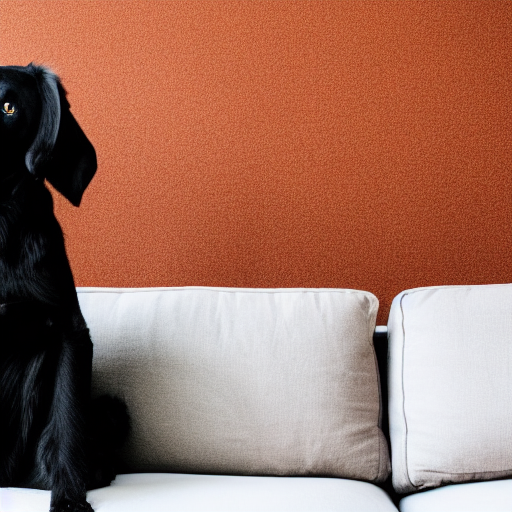

In [4]:
genny.generate(PROMPT, save_img=True)

In [5]:
planner = PLAN("gpt4o", SYS_PROMPT, EXAMPLES) #options : ['gpt4o', 'Qwen/Qwen2-VL-72B-Instruct', 'Qwen/Qwen2-VL-7B-Instruct']

In [6]:
plans = planner.generate(f"./TEST/{MODEL}/base_img.png", PROMPT)

**Analysis and Comparison**:

**Textual Elements**:
- Black dog
- Brown couch
- White wall

**Image Elements**:
- Black dog (Correct)
- Brown couch (Mistake: The couch is white)
- Orange wall (Mistake: The wall is not white)

**Mistake Identification**:
- The couch is white instead of brown.
- The wall is orange instead of white.

**Feedback**:
- Change the couch color to brown.
- Change the wall color to white.


In [7]:
plans = ['Change the couch color to brown.', 'Change the wall color to white.']

### PixEdit

* Clone the [github repo](https://github.com/dair-iitd/PixEdit/tree/main) and set it up inside **editors** directory, download the checkpoint

### InstructPix2Pix | Aurora | MagicBrush

* Clone the [instruct-pix2pix](https://github.com/timothybrooks/instruct-pix2pix) inside the **editors** and setup its environment


### OmniGen

* Clone the [repo](https://github.com/VectorSpaceLab/OmniGen?tab=readme-ov-file) and setup its environment

In [8]:
editor = EDIT('PixEdit', './editors/PixEdit/PixEdit-v1/epoch_40_step_90041.pth')

# editor = EDIT('AURORA', './aurora-mixratio-15-15-1-1-42k-steps.ckpt')
# editor = EDIT('MagicBrush', './MagicBrush-epoch-52-step-4999.ckpt')
# editor = EDIT('InstructPix2Pix',  "./instruct-pix2pix-00-22000.ckpt")
# editor = EDIT('OmniGen',  "Shitao/OmniGen-v1")

/scratch/scai/phd/aiz228170/GraPE/editors/PixEdit


/home/scai/phd/aiz228170/.conda/envs/pixedit/lib/python3.9/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


GOT INPUT SIZE:  64


2024-12-09 01:30:02,986 - PixArt - WARNING - position embed interpolation: 1.0, base size: 32
2024-12-09 01:30:02,988 - PixArt - WARNING - kv compress config: {'sampling': None, 'scale_factor': 1, 'kv_compress_layer': []}
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [9]:
O, I = editor.edit(f"./TEST/{MODEL}/base_img.png", plans)

Change the couch color to brown.



00%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:03<00:00,  4.29it/s]

Change the wall color to white.



00%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:02<00:00,  4.43it/s]

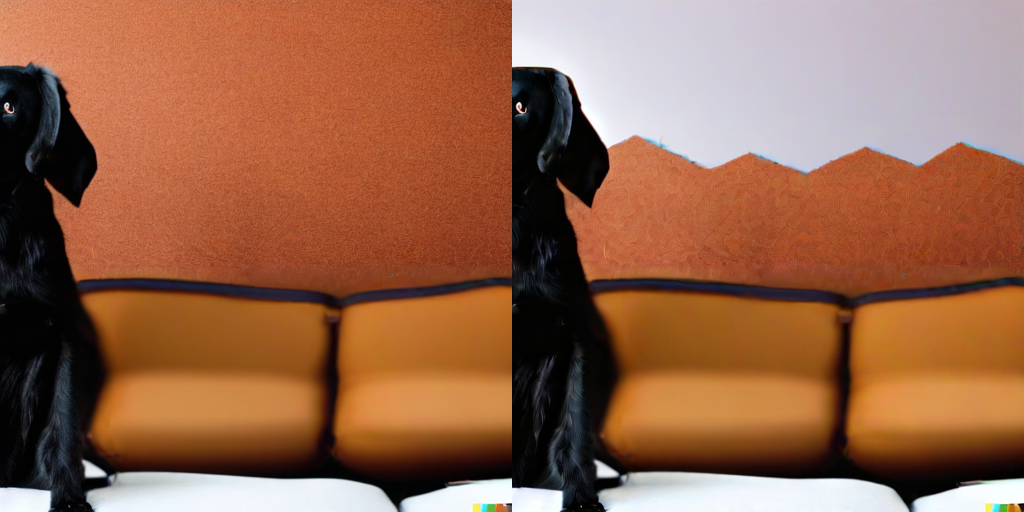

In [10]:
make_image_grid(I, rows=1, cols= len(I))